In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1

[]

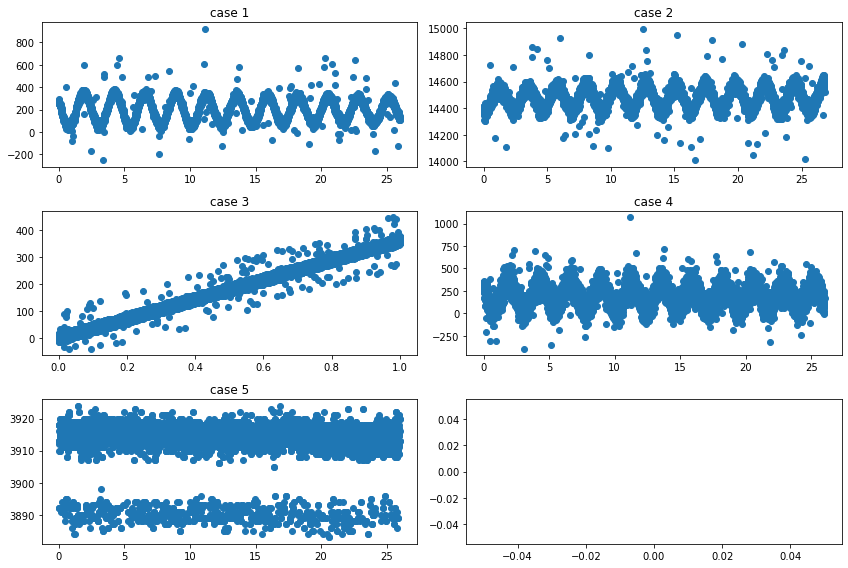

In [17]:
N = 5
df = [pd.read_csv(f'./Task01/case{i}.txt', header=None,names=['x','y']) for i in range(1,N+1)]
R = 3
C = 2
K = 4
fig, axs = plt.subplots(nrows=R,ncols=C, figsize=(R*K, C*K))
for i in range(R):
  for j in range(C):
    t = i * C + j
    if t < N:
      axs[i,j].scatter(df[t].iloc[:,0],df[t].iloc[:,1])
      axs[i,j].set_title(f"case {t+1}")
plt.tight_layout()
plt.plot()

In cases `1`,`2`,`4`, we can see (shifted) `cos` waves.

In cases `3`,`5`, there are more or less straight lines.

My case is the case `1`.

In [18]:
x = df[0].x
y = df[0].y

I want to fit the curve $a \cdot sin (w \cdot t + b) + c$.

For this, I will use Gauss-Newton's method suggested [here](https://math.stackexchange.com/a/319118).

In [25]:
import sympy as sp
A,B,C,D,X,Y = sp.symbols('A B C D X Y')
f = A * sp.sin(B * X + C) + D
F = sp.Matrix([f])
F = F.jacobian([A,B,C,D])
F

Matrix([[sin(B*X + C), A*X*cos(B*X + C), A*cos(B*X + C), 1]])

In [31]:
from sympy.utilities.lambdify import lambdify
Fl = lambdify([A,B,C,D,X,Y],F)
Rl = lambdify([A,B,C,D,X,Y],Y-f)

In [ ]:
N = 10
for i in range(N):
    pass

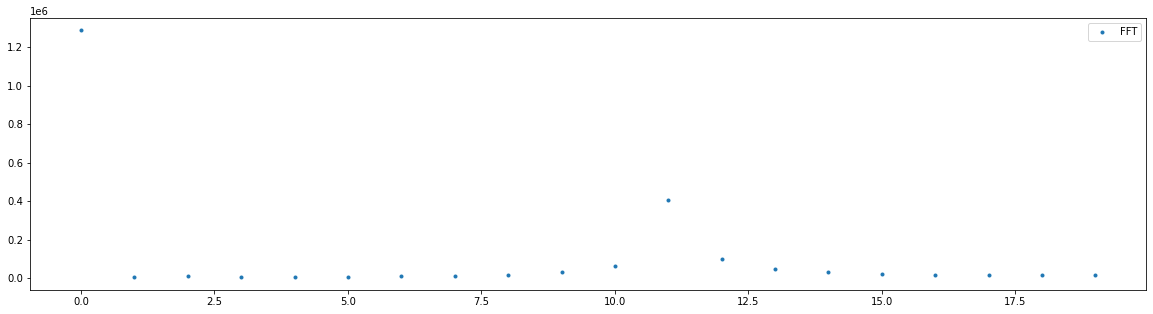

In [16]:
t = df[0].iloc[:,0]
freqs = np.arange(len(t))
d = df[0].iloc[:,1]
ff = np.fft.fft(d)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
ax.plot(freqs[:20],np.abs(ff[:20]),'.',label='FFT')
ax.legend()
plt.show()

1286468.9981

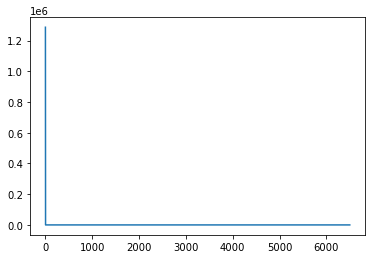

In [8]:
# n = len(t)
# freqs = np.arange(n)
# plt.plot(freqs, np.abs(ff))
# d = np.max(np.abs(ff))

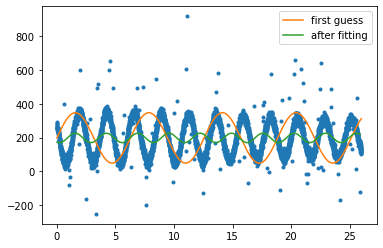

In [5]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

# N = 1000 # number of data points
# t = np.linspace(0, 4*np.pi, N)
# data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

t = sines[0].iloc[:,0]
data = sines[0].iloc[:,1]

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters

optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,np.max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()